# Modele grupujące

Jednym z najczęściej rozważanych modeli wykorzystujących uczenie nienadzorowane są modele grupujące. W odróżnieniu od zadania klasyfikacji w grupowaniu, najczęściej nie mamy z góry wiedzy na temat rodzaju grup na jaki podzielone są dane. Jest to zatem technika eksplorowania informacji z danych. Zaprezentujemy kilka najczęściej wykorzystywanych algorytmów

## Algorytm k-średnich

Algorytm k-średnich ma za cel znalezienie k-punktów, odgrywających rolę skupień. Algorytm prezentuje się następująco:

1. Określ ilość skupień
1. Dokonaj podziału w sposób losowy zbioru obserwacji na rozłączne i niepuste skupienia.
1. Wyznacz środek każdego skupienia jako średnią arytmetyczną po współrzędnych punktów
1. Zaktualizuj przydział każdego wiersza do skupiska, poprzez przypisanie go do najbliższego mu skupiska
1. Powtarzaj kroki 3-4 aż do stabilizacji rozwiązania (braku wymian pomiędzy skupiskami)

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
X.size

600

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Przejdźmy do tworzenia modelu

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)

km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
y_hat = km.predict(X)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

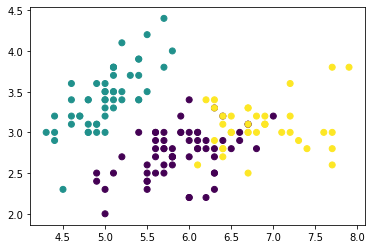

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

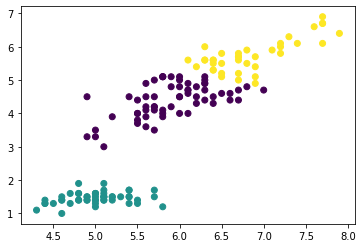

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

## Hierarchiczna analiza skupień (dendrogramy)

Do największych ograniczeń algorytmu k-średnich jest konieczność podania z góry określonej liczby grup. Od tego problemu w pewnym zakresie uwolniony jest algorytm tworzący dendreogramy np. w oparciu algorytm aglomeryzacji

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3)

cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Wytwórzmy dendrogram

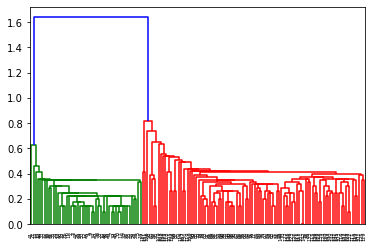

In [8]:
from scipy.cluster.hierarchy import *
dendrogram(single(X))
plt.show()

Najczęściej na podstawie takiego dendrogramu możemy zastanowić się ile grup należy rozważyć. Tu być może rozsądny byłby podział na 3 grupy (nie te same co wskazują kolory

In [9]:
y_hat = cluster.labels_

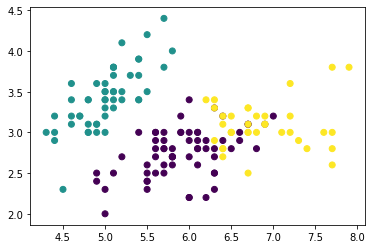

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

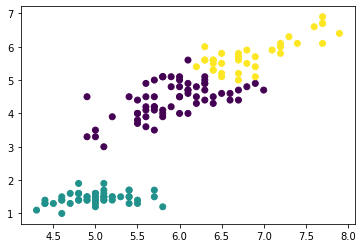

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

## Dbscan

Jednym z najczęściej rekomendowanych algorytmów grupujących jest dbscan - czyli algorytm grupujący na podstawie gęstością z opcją szumu.

Algorytm działa w następującyc sposób. 

1. Wybierany jest pewien punkt początkowy. 
1. Następnie dołączany do niego (do grupy) jest każdy punkt ze zbioru danych, który jest bliżej niż $\varepsilon$ od dowolnego elementu z grupy. 
1. Dołączamy do grupy aż braknie elementów w zasięgu $\varepsilon$ wokół grupy.
1. Jeśli grupa okazuje się być liczna - staje się klastrem wynikowym, jeśli mała - jest oznacza jako szum
1. Jeśli są jeszcze wolne punkty wybierany jest klejny punkt do budowy grupy.

In [12]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps= 0.25)

dbs.fit(X)

y_hat = dbs.labels_

Pozostaje nam porównać rezultat

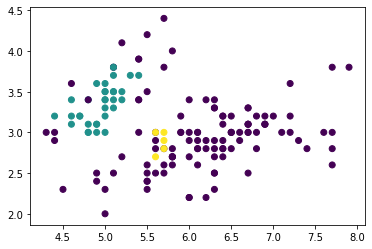

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

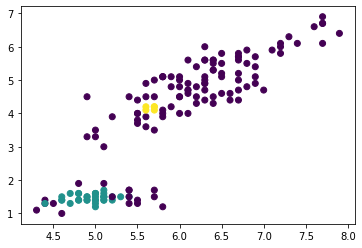

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2]
plt.scatter(x, y, c=y_hat)
plt.show()

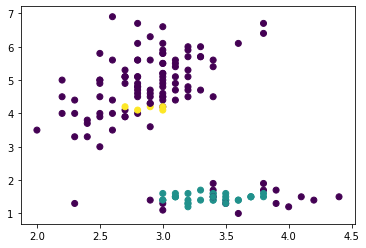

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 1]
y = X[:, 2]
plt.scatter(x, y, c=y_hat)
plt.show()

Jak widać wypracowane przez niego skupiska nie są specjalnie zgodne z naszymi intuicjami.

# Algorytm EM

Algorytm EM posiada ideę podobną do k-średnich, jednak zamiast sztywnego przypisania do grupy/klastra mamy przypisanie na podstawie probabilistycznej.

Grupy są reprezentowane przez wielowymiarowe rozkłady (np. normalne), co oznacza że klastry przecinają się w sensie probabilistycznym (Element należy do grupy 1 z pewnym prstwem a do grupy 2 z innym)

W algorytmie tym na przemian oceniane są 
* prawdopodobieństwa przynależności do poszczególnych grup (prawdopodobieństwa Bayes), oraz
* estymowane są prawdopodobieństwa parametrów mieszaniny.

In [20]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components = 3)
y_hat = gmm.fit_predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

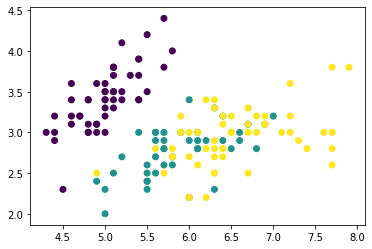

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

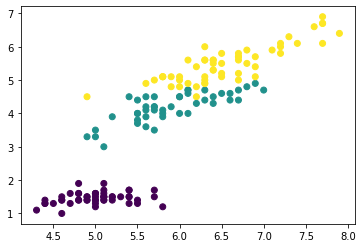

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

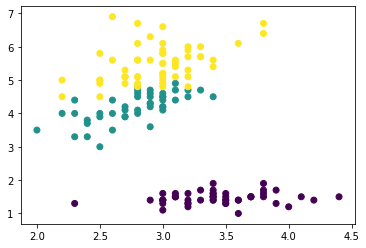

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 1]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

# Algorytm Mean-shift 

Dostępny jest również algorytm Mean-shift - wyjatkowy, gdyż nie zakłada z góry ilości składowych

In [25]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X)
y_hat = ms.labels_
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

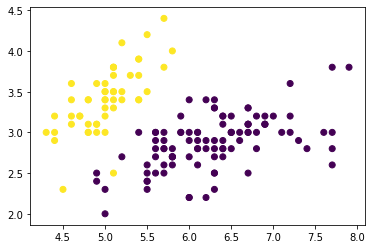

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

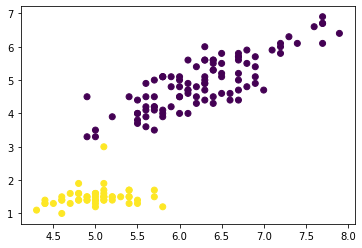

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

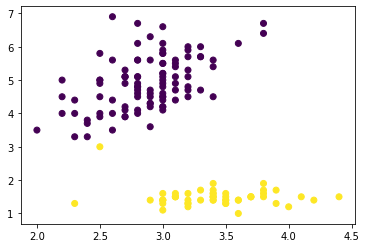

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 1]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()